In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
X_file_path = "logisticX.csv"
X = pd.read_csv(X_file_path)

In [26]:
y_file_path = "logisticY.csv"
y = pd.read_csv(y_file_path)

In [27]:
X.insert(0, 'Intercept', 1)

In [28]:
y = y.values.ravel()


In [29]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * (-y @ np.log(h) - (1 - y) @ np.log(1 - h))
    return cost

In [30]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        gradient = (1 / m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history


In [31]:
theta = np.zeros(X.shape[1])


In [32]:
alpha = 0.01
iterations = 1000

In [33]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

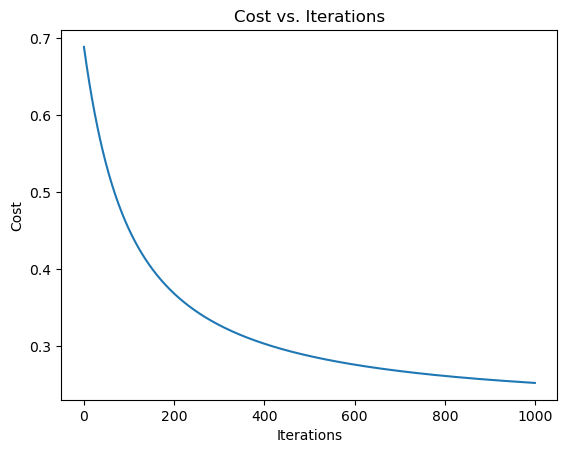

In [34]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [35]:
# Set hyperparameters
alpha = 0.1
iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Print the final cost function value and learning parameter value after convergence
print("Final cost function value:", cost_history[-1])
print("Learning parameter value (theta):", theta)


Final cost function value: 0.22553619470155423
Learning parameter value (theta): Intercept    0.085226
3.8915       1.947183
4.2105      -1.910988
dtype: float64


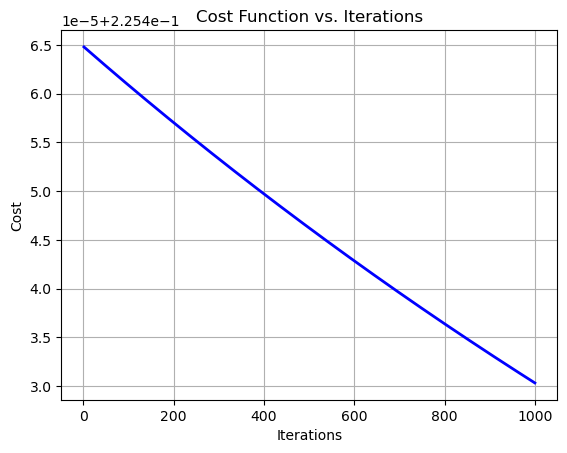

In [41]:
import matplotlib.pyplot as plt

# Set hyperparameters
alpha = 0.1
iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Plot the cost function vs. iteration graph
plt.plot(range(1, iterations + 1), cost_history, color='blue', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.grid(True)
plt.show()

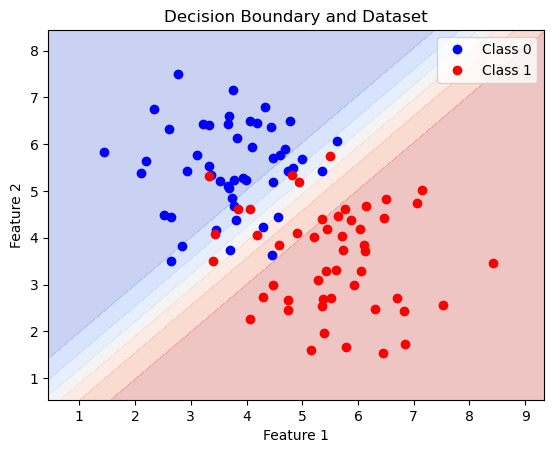

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate a grid of points to plot the decision boundary
x1_min, x1_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
x2_min, x2_max = X.iloc[:, 2].min() - 1, X.iloc[:, 2].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))

# Flatten the grid to create a matrix
grid = np.c_[xx1.ravel(), xx2.ravel()]
grid = np.insert(grid, 0, 1, axis=1)

# Calculate the predicted probabilities for the grid points
Z = logistic_function(grid @ theta)
Z = Z.reshape(xx1.shape)

# Plot the decision boundary and the dataset
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')

# Plot class 0 (blue)
plt.plot(X.iloc[y == 0, 1], X.iloc[y == 0, 2], 'bo', label='Class 0')

# Plot class 1 (red)
plt.plot(X.iloc[y == 1, 1], X.iloc[y == 1, 2], 'ro', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Dataset')
plt.legend()
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KIIT\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KIIT\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KIIT\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KIIT\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KIIT\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  r

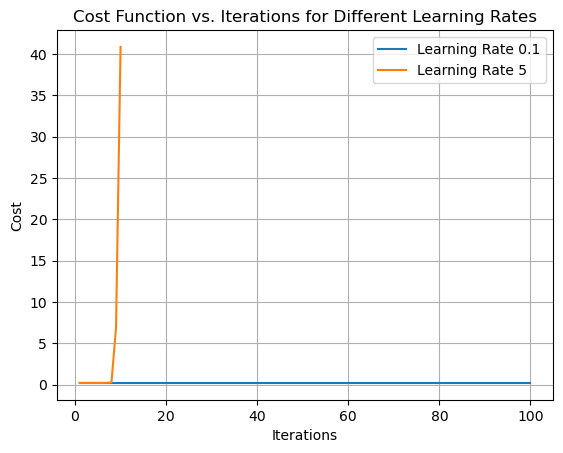

In [38]:
import matplotlib.pyplot as plt

# Set hyperparameters
alpha_1 = 0.1
alpha_2 = 5
iterations = 100

# Perform gradient descent for learning rate 0.1
theta_1, cost_history_1 = gradient_descent(X, y, theta.copy(), alpha_1, iterations)

# Perform gradient descent for learning rate 5
theta_2, cost_history_2 = gradient_descent(X, y, theta.copy(), alpha_2, iterations)

# Plot the cost function vs. iteration graph for both learning rates
plt.plot(range(1, iterations + 1), cost_history_1, label='Learning Rate 0.1')
plt.plot(range(1, iterations + 1), cost_history_2, label='Learning Rate 5')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Make predictions on the training dataset
predictions = np.round(sigmoid(X @ theta_1))

# Define a function to calculate confusion matrix
def confusion_matrix(actual, predicted):
    TP = np.sum(np.logical_and(actual == 1, predicted == 1))
    FP = np.sum(np.logical_and(actual == 0, predicted == 1))
    FN = np.sum(np.logical_and(actual == 1, predicted == 0))
    TN = np.sum(np.logical_and(actual == 0, predicted == 0))
    return TP, FP, FN, TN

# Calculate confusion matrix
TP, FP, FN, TN = confusion_matrix(y, predictions)

# Calculate accuracy
accuracy = (TP + TN) / len(y)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print confusion matrix and evaluation metrics
print("Confusion Matrix:")
print("True Positive:", TP)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Negative:", TN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Confusion Matrix:
True Positive: 43
False Positive: 5
False Negative: 7
True Negative: 44
Accuracy: 0.8787878787878788
Precision: 0.8958333333333334
Recall: 0.86
F1-score: 0.8775510204081632
